# 훈련과 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier( max_depth=2, criterion='gini', random_state=42)
tree_clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(tree_clf, 
                out_file="iris_tree.dot", 
                class_names=iris.target_names,
                #feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
                feature_names = iris.feature_names[2:], 
                rounded = True,                
                filled=True)

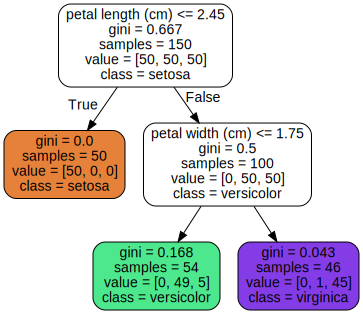

In [6]:
import graphviz
with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 클래스와 클래스 확률을 예측하기

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

* 참고) Feature 중요도

Feature importances:
[0.562 0.438]
sepal length (cm) : 0.562
sepal width (cm) : 0.438


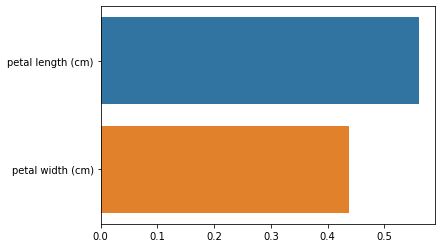

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(tree_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , tree_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=tree_clf.feature_importances_ , y=iris.feature_names[2:])
#sns.barplot(x=tree_clf.feature_importances_ , y=iris.feature_names)

# 회귀 트리

In [7]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [9]:
export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

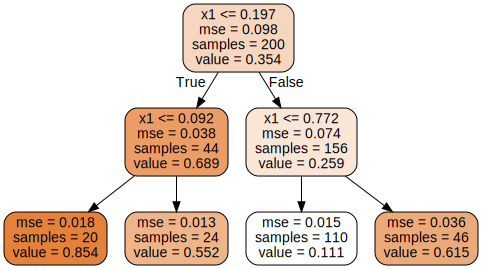

In [10]:
import graphviz
with open("regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
#dot.format = 'png'
#dot.render(filename='regression_tree', directory='images/decision_trees', cleanup=True)
dot

In [11]:
tree_reg.predict([[0.6]])

array([0.11063973])